<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению. Сессия № 2
</center>
Автор материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий. Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

# <center>Домашнее задание № 3 
## <center> Деревья решений для классификации и регрессии

**В этом задании мы разберемся с тем, как работает дерево решений в задаче регрессии, а также построим (и настроим) классифицирующие деревья решений в задаче прогнозирования сердечно-сосудистых заболеваний. 
Заполните код в клетках (где написано "Ваш код здесь") и ответьте на вопросы в [веб-форме](https://goo.gl/rvvZiR).**

In [50]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz

## 1. Простой пример восстановления регрессии с помощью дерева решений

Рассмотрим следующую одномерную задачу восстановления регрессии. Неформально, надо построить функцию $a(x)$, приближающую искомую зависимость $y = f(x)$ в терминах среднеквадратичной ошибки: $min \sum_i {(a(x_i) - f(x_i))}^2$. Подробно мы рассмотрим эту задачу в следующий раз ([4-я статья курса](https://habrahabr.ru/company/ods/blog/323890/)), а пока поговорим о том, как решать эту задачу с помощью дерева решений. Предварительно прочитайте небольшой раздел ["Дерево решений в задаче регрессии"](https://habrahabr.ru/company/ods/blog/322534/#derevo-resheniy-v-zadache-regressii) 3-ей статьи курса. 

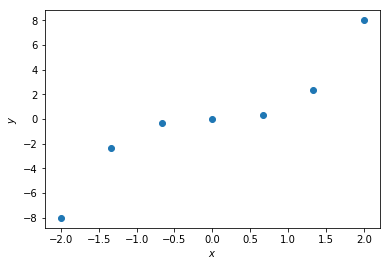

In [9]:
X = np.linspace(-2, 2, 7)
def f (x):
    return x ** 3
y = X ** 3

plt.scatter(X, y)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$');

Проделаем несколько шагов в построении дерева решений. Исходя из соображений симметрии, выберем пороги для разбиения равными соответственно 0, 1.5 и -1.5. Напомним, что в случае задачи восстановления регрессии листовая вершина выдает среднее значение ответа по всем объектам обучающей выборки, попавшим в эту вершину.

Итак, начнём. Дерево глубины 0 состоит из одного корня, который содержит всю обучающую выборку. Как будут выглядеть предсказания данного дерева для $x \in [-2, 2]$? Постройте соответствующий график.

In [4]:
# Ваш код здесь

from sklearn.tree import DecisionTreeRegressor

reg_tree = DecisionTreeRegressor(max_depth=5, random_state=17)

reg_tree.fit(pd.DataFrame(X), pd.DataFrame(y))
reg_tree_pred = reg_tree.predict(pd.DataFrame(np.linspace(-2, 2, 100)))

Произведем первое разбиение выборки по предикату $[x < 0]$. Получим дерево глубины 1 с двумя листьями. Постройте аналогичный график предсказаний для этого дерева.

In [5]:
# Ваш код здесь

В алгоритме построения дерева решений признак и значение порога, по которым происходит разбиение выборки, выбираются исходя из некоторого критерия. Для регрессии обычно используется дисперсионный критерий:
$$Q(X, j, t) = D(X) - \dfrac{|X_l|}{|X|} D(X_l) - \dfrac{|X_r|}{|X|} D(X_r),$$
где $X$ – выборка, находящаяся в текущей вершине, $X_l$ и $X_r$ – разбиение выборки $X$ на две части по предикату $[x_j < t]$ (то есть по $j$-ому признаку и порогу $t$), а $D(X)$ – дисперсия ответов на выборке $X$:
$$D(X) = \dfrac{1}{|X|} \sum_{x_j \in X}(y_j – \dfrac{1}{|X|}\sum_{x_i \in X}y_i)^2,$$
где $y_i = y(x_i)$ – ответ на объекте $x_i$. При каждом разбиении вершины выбираются признак $j$ и значение порога $t$, максимизирующие значение функционала $Q(X, j, t)$.

В нашем случае признак всего один, поэтому $Q$ зависит только от значения порога $t$ (и ответов выборки в данной вершине). 

Постройте график функции $Q(X, t)$ в корне в зависимости от значения порога $t$ на отрезке $[-1.9, 1.9]$.

In [6]:
def regression_var_criterion(X, y, t):
    pass

In [7]:
# Ваш код здесь

**<font color='red'>Вопрос 1.</font> Оптимально ли с точки зрения дисперсионного критерия выбранное нами значение порога $t = 0$?**
- Да!
- Нет

Теперь произведем разбиение в каждой из листовых вершин. В левой (соответствующей ветви $x < 0$) – по предикату $[x < -1.5]$, а в правой (соответствующей ветви $x \geqslant 0$) – по предикату $[x < 1.5]$. Получится дерево глубины 2 с 7 вершинами и 4 листьями. Постройте график предсказаний этого дерева для $x \in [-2, 2]$.

In [ ]:
def pred(x):
    if x < 0:
        if x < -1.5:
            

In [8]:
X

array([-2.        , -1.33333333, -0.66666667,  0.        ,  0.66666667,
        1.33333333,  2.        ])

In [7]:
# Ваш код здесь

**<font color='red'>Вопрос 2.</font> Из скольки отрезков состоит график, изображающий предсказания построенного дерева на отрезке [-2, 2]?**
- 5
- 6
- 7!
- 8

## 2. Построение дерева решений для прогноза сердечно-сосудистых заболеваний
Считаем в `DataFrame` знакомый нам набор данных по сердечно-сосудистым заболеваниям. 

In [89]:
df = pd.read_csv('../../data/mlbootcamp5_train.csv', 
                 index_col='id', sep=';')

In [71]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Сделайте небольшие преобразования признаков: постройте признак "возраст в годах", а также постройте по 3 бинарных признака на основе `cholesterol` и `gluc`, где они, соответственно, равны 1, 2 или 3. Эта техника называется dummy-кодированием или One Hot Encoding (OHE), удобней всего в данном случае использовать `pandas.get_dummmies`.

In [90]:
# Ваш код здесь
df = pd.get_dummies(df, prefix=["cholesterol", "gluc"], prefix_sep="_", columns=['cholesterol', 'gluc'])
df['age_years'] = df.age.apply(lambda x: x / 365.25)

In [91]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3,age_years
id,,,,,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,0,0,1,0,1,0,0,1,0,0,50.357290
1,20228,1,156,85.0,140,90,0,0,1,1,0,0,1,1,0,0,55.381246
2,18857,1,165,64.0,130,70,0,0,0,1,0,0,1,1,0,0,51.627652
3,17623,2,169,82.0,150,100,0,0,1,1,1,0,0,1,0,0,48.249144
4,17474,1,156,56.0,100,60,0,0,0,0,1,0,0,1,0,0,47.841205


Разбейте выборку на обучающую и отложенную (holdout) части в пропорции 7/3. Для этого используйте метод `sklearn.model_selection.train_test_split`, зафиксируйте у него `random_state`=17.

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(df.drop('cardio', axis=1), df['cardio'], random_state=17, test_size=0.3)

Обучите на выборке `(X_train, y_train)` дерево решений с ограничением на максимальную глубину в 3. Зафиксируйте у дерева `random_state=17`. Визуализируйте дерево с помошью `sklearn.tree.export_graphviz`, `dot` и `pydot`. Пример дан в [статье](https://habrahabr.ru/company/ods/blog/322534/) под спойлером "Код для отрисовки дерева". Обратите внимание, что команды в Jupyter notebook, начинающиеся с восклицательного знака – это терминальные команды (которые мы обычно запускаем в терминале/командной строке).

In [28]:
from sklearn.tree import DecisionTreeClassifier

reg_tree = DecisionTreeClassifier(max_depth=3, random_state=17)

reg_tree.fit(X_train, y_train)
# Ваш код здесь

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best')

In [32]:
from sklearn.tree import export_graphviz
export_graphviz(reg_tree, out_file='tree.dot')

In [35]:
X_train.head()

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3,age_years
id,,,,,,,,,,,,,,,,
30908,18243,2,169,76.0,160,80,0,0,1,1,0,0,1,0,0,49.946612
86475,17445,2,158,68.0,140,90,1,0,1,1,0,0,1,0,0,47.761807
77291,22645,1,165,70.0,120,80,0,0,1,1,0,0,0,1,0,61.998631
63162,16778,1,140,70.0,140,90,0,0,0,1,0,0,1,0,0,45.935661
43647,17606,2,172,101.0,120,80,0,0,0,1,0,0,1,0,0,48.202601


In [34]:
!dot -Tpng 'tree.dot' -o 'tree.png'

<img src='tree.png'>

**<font color='red'>Вопрос 3.</font> Какие 3 признака задействуются при прогнозе в построенном дереве решений? (то есть эти три признака "можно найти в дереве")**
- weight, height, gluc=3
- smoke, age, gluc=3
- age, weight, chol=3
- age, ap_hi, chol=3!

Сделайте с помощью обученного дерева прогноз для отложенной выборки `(X_valid, y_valid)`. Посчитайте долю верных ответов (accuracy).

In [36]:
# Ваш код здесь
y_valid = reg_tree.predict(X_valid)

Теперь на кросс-валидации по выборке  `(X_train, y_train)`  настройте глубину дерева, чтобы повысить качество модели. Используйте GridSearchCV, 5-кратную кросс-валидацию. Зафиксируйте у дерева `random_state`=17. Перебирайте параметр `max_depth` от 2 до 10. 

In [41]:
grid = GridSearchCV(reg_tree, {"max_depth": range(2, 10)})

In [47]:
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(2, 10)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)

In [49]:
grid.best_params_

{'max_depth': 5}

Нарисуйте график того, как меняется средняя доля верных ответов на кросс-валидации в зависимости от значения `max_depth`.

In [54]:
cross_val_score(reg_tree, X_train, y_train, cv=10).mean()


0.72771437506651515

In [61]:
a = []
for i in range(2, 11):
    
    tree = DecisionTreeClassifier(max_depth=i, random_state=17)
    tree.fit(X_train, y_train)
    a. append(cross_val_score(tree, X_train, y_train, cv=2, n_jobs=4).mean())


In [59]:
a[3], a[5]

(0.73114300900050788, 0.73242872328452213)

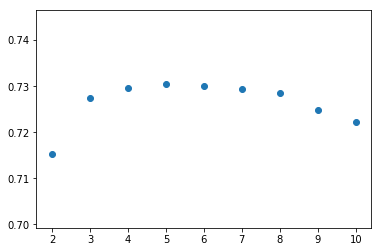

In [62]:
plt.scatter(range(2,11), a)


Выведите лучшее значение `max_depth`, то есть такое, при котором среднее значение метрики качества на кросс-валидации максимально. Посчитайте также, какова теперь доля верных ответов на отложенной выборке. Все это можно сделать с помощью обученного экземпляра класса `GridSearchCV`.

In [64]:
accuracy_score?

In [66]:
y_valid

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [67]:
y_predict

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [74]:
tree3 = DecisionTreeClassifier(max_depth=3, random_state=17)
tree3.fit(X_train, y_train)
y_predict = tree3.predict(X_valid)
accuracy_score(y_valid, y_predict)

0.72128571428571431

In [75]:
tree5 = DecisionTreeClassifier(max_depth=5, random_state=17)
tree5.fit(X_train, y_train)
y_predict = tree5.predict(X_valid)
accuracy_score(y_valid, y_predict)

0.73038095238095235

**<font color='red'>Вопрос 4.</font> Имеется ли на кривой валидации по максимальной глубине дерева четкий пик, если перебирать `max_depth` от 2 до 10? Повысила ли настройка глубины дерева качество классификации (accuracy) более чем на 1% на отложенной выборке?**
- да, да
- да, нет
- нет, да
- нет, нет!

Обратимся опять (как и в 1 домашке) к картинке, демонстрирующей шкалу SCORE для расчёта риска смерти от сердечно-сосудистого заболевания в ближайшие 10 лет.
<img src='../../img/SCORE2007.png' width=70%>

Создайте бинарные признаки, примерно соответствующие этой картинке:
- $age \in [45,50), \ldots age \in [60,65) $ (4 признака)
- верхнее артериальное давление: $ap\_hi \in [120,140), ap\_hi \in [140,160), ap\_hi \in [160,180),$ (3 признака)

Далее будем строить дерево решений с этим признаками, а также с признаками ``smoke``, ``cholesterol``  и ``gender``. Из признака ``cholesterol`` надо сделать 3 бинарных, соотв-х уникальным значениям признака ( ``cholesterol``=1,  ``cholesterol``=2 и  ``cholesterol``=3), эта техника называется dummy-кодированием или One Hot Encoding (OHE). Признак ``gender`` надо перекодировать: значения 1 и 2 отобразить на 0 и 1. Признак лучше переименовать в ``male`` (0 – женщина, 1 – мужчина). В общем случае кодирование значений делает ``sklearn.preprocessing.LabelEncoder``, но в данном случае легко обойтись и без него.

Итак, дерево решений строится на 12 бинарных признаках.

Постройте дерево решений с ограничением на максимальную глубину = 3 и обучите его на всей исходной обучающей выборке. Используйте `DecisionTreeClassifier`, на всякий случай зафикисровав `random_state=17`, остальные аргументы (помимо `max_depth` и `random_state`) оставьте по умолчанию. 

**<font color='red'>Вопрос 5.</font> Какой бинарный признак из 12 перечисленных оказался самым важным для обнаружения ССЗ, то есть поместился в вершину построенного дерева решений?**
- Верхнее артериальное давление от 160 до 180 (мм рт.ст.)
- Пол мужской / женский
- Верхнее артериальное давление от 140 до 160 (мм рт.ст.)!
- Возраст от 50 до 55 (лет)
- Курит / не курит
- Возраст от 60 до 65 (лет)

In [124]:
len(X_train[X_train.ap_hi_160_180 == 1]), len(X_train[X_train.ap_hi_160_180 == 0])

(2730, 46270)

In [136]:
X_train.columns[9]

'ap_hi_140_160'

In [130]:
!rm tree*

In [135]:
X_train, X_valid, y_train, y_valid = train_test_split(new_df.drop('cardio', axis=1), 
                                                      new_df['cardio'], random_state=17, test_size=0.3)

f = DecisionTreeClassifier(max_depth=3, random_state=17)
f.fit(X_train.drop('ap_hi_160_180', axis=1), y_train)
export_graphviz(f, out_file='tree5.dot')

!dot -Tpng 'tree5.dot' -o 'tree5.png'


<img src='tree5.png'>

<img src='tree3.png'>

In [103]:
new_df = df[['smoke', 'gender', 'age_years', 'ap_hi', 'cholesterol_1', 'cholesterol_2', 'cholesterol_3', 'cardio']]
new_df['age_45_50'] = new_df.age_years.apply(lambda x: 1 if x >= 45 and x < 50 else 0)
new_df['age_50_55'] = new_df.age_years.apply(lambda x: 1 if x >= 50 and x < 55 else 0)
new_df['age_55_60'] = new_df.age_years.apply(lambda x: 1 if x >= 55 and x < 60 else 0)
new_df['age_60_65'] = new_df.age_years.apply(lambda x: 1 if x >= 45 and x < 65 else 0)

new_df['ap_hi_120_140'] = new_df.ap_hi.apply(lambda x: 1 if x >= 120 and x < 140 else 0)
new_df['ap_hi_140_160'] = new_df.ap_hi.apply(lambda x: 1 if x >= 140 and x < 160 else 0)
new_df['ap_hi_160_180'] = new_df.ap_hi.apply(lambda x: 1 if x >= 160 and x < 180 else 0)
new_df['male'] = new_df.gender.apply(lambda x: 1 if x == 2 else 0)
new_df = new_df.drop(['gender', 'age_years', 'ap_hi'], axis=1)
new_df.head()

/Users/vadegg/workspace/macheneLearning/mlcourse_open/mlcourse_open_venv/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/vadegg/workspace/macheneLearning/mlcourse_open/mlcourse_open_venv/lib/python3.5/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/vadegg/workspace/macheneLearning/mlcourse_open/mlcourse_open_venv/lib/python3.5/site-packages/ipykernel_launcher.p

,smoke,cholesterol_1,cholesterol_2,cholesterol_3,cardio,age_45_50,age_50_55,age_55_60,age_60_65,ap_hi_120_140,ap_hi_140_160,ap_hi_160_180,male
id,,,,,,,,,,,,,
0,0,1,0,0,0,0,1,0,1,0,0,0,1
1,0,0,0,1,1,0,0,1,1,0,1,0,0
2,0,0,0,1,1,0,1,0,1,1,0,0,0
3,0,1,0,0,1,1,0,0,1,0,1,0,1
4,0,1,0,0,0,1,0,0,1,0,0,0,0
